<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Necessary Libraries**

In [479]:
# Installing required libraries
# !pip install --upgrade tensorflow
# !pip install fancyimpute scikit-learn pandas
# !pip install --upgrade scikit-learn imbalanced-learn

# **Importing Necessary Libraries**

In [480]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import random
import pickle
import joblib

# **Mounting the Google Drive**

In [481]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [482]:
# Loading the dataset with the proper delimiter (semicolon)
data = pd.read_excel('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/IMPORT STATISTICS - 2023.xlsx')

In [483]:
# Displaying the first few rows of the data
data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,Unknown,2023.0,JANUARY,280110,BANGLADESH,Kg.,131600.0,13877114.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
1,Unknown,2023.0,JANUARY,280110,INDIA,Kg.,37800.0,3924989.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
2,Unknown,2023.0,JANUARY,280110,MALAYSIA,Kg.,12090.0,5390772.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
3,Unknown,2023.0,FEBRUARY,280110,BANGLADESH,Kg.,25200.0,3089445.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine
4,Unknown,2023.0,FEBRUARY,280110,INDIA,Kg.,75599.0,6939860.0,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine ...",Chlorine


# **Exploratary Data Analysis**

In [484]:
# Displaying information
print("Displaying data information")
data.info()

Displaying data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   MONTH           292 non-null    object 
 3   HSCODE          1042 non-null   int64  
 4   COUNTRY         1038 non-null   object 
 5   UNIT            1042 non-null   object 
 6   QUANTITY        1039 non-null   float64
 7   VALUE_RS        292 non-null    float64
 8   DESCRIPTION_01  1042 non-null   object 
 9   DESCRIPTION_02  1042 non-null   object 
 10  DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 89.7+ KB


## **Identifying Categorical and Numerical Features**

In [485]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [486]:
# Displaying the Categorical and the Numerical columns'
print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['IMPORTER', 'MONTH', 'COUNTRY', 'UNIT', 'DESCRIPTION_01',
       'DESCRIPTION_02', 'DESCRIPTION_03'],
      dtype='object')

Numerical Columns:
Index(['YEAR', 'HSCODE', 'QUANTITY', 'VALUE_RS'], dtype='object')


**Since 'HSCODE' column has been misintepreted as an int64 data type column due to the unavailability of data, reassigning it has an object type column.**

In [487]:
# Converting 'IMPORTER' and 'HSCODE' columns to string type
data['HSCODE'] = data['HSCODE'].astype(str)

# Displaying the HSCODE column data type
print("Data Type of HSCODE Columns:")
print(data[['HSCODE']].dtypes)

Data Type of HSCODE Columns:
HSCODE    object
dtype: object


### **Categorical Features**

In [488]:
# List of categorical features
categorical_features = ['IMPORTER', 'MONTH', 'COUNTRY', 'HSCODE', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02', 'DESCRIPTION_03']

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- IMPORTER
- MONTH
- COUNTRY
- HSCODE
- UNIT
- DESCRIPTION_01
- DESCRIPTION_02
- DESCRIPTION_03

Data Type of Categorical Features:
IMPORTER          object
MONTH             object
COUNTRY           object
HSCODE            object
UNIT              object
DESCRIPTION_01    object
DESCRIPTION_02    object
DESCRIPTION_03    object
dtype: object


**Unique values and their counts relevant to each categorical column**

In [489]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
U.S.A.       1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
UNIT
Kg     750
Kg.    112
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic comp

**Categorical columns with null values and their relevant counts**

In [490]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:
MONTH: 750
COUNTRY: 4


**Categorical columns with 'Unknown' values and their relevant counts**

In [491]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:
IMPORTER: 1042


## **Numerical Features**

**Since 'Year' column has been misintepreted as a float64 data type column reassigning it as a int64 type column**

In [492]:
# Converting the 'Year' column to int64 data type
# data['YEAR'] = data['YEAR'].astype(int)

# Displaying the data type of the 'Year' column
# print("Data Type of 'Year' Column:")
# print(data['YEAR'].dtype)

**The conversion cannot be done since the column contains missing values (both N/A and null values)**

In [493]:
# List of numerical features
numerical_features = ['YEAR', 'QUANTITY', 'VALUE_RS']

# Displaying the numerical features
print("Numerical Features:")
for feature in numerical_features:
    print(f"- {feature}")

# Display the data type of the numerical features
print("\nData Type of Numerical Features:")
print(data[numerical_features].dtypes)

Numerical Features:
- YEAR
- QUANTITY
- VALUE_RS

Data Type of Numerical Features:
YEAR        float64
QUANTITY    float64
VALUE_RS    float64
dtype: object


**Unique values and their counts in the numerical columns**

In [494]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

YEAR
2016.0    180
2023.0    112
Name: count, dtype: int64
 
QUANTITY
1000.0     55
1.0        49
16200.0    40
5.0        31
27.0       28
           ..
204.0       1
23200.0     1
22820.0     1
22560.0     1
19050.0     1
Name: count, Length: 359, dtype: int64
 
VALUE_RS
0.40           4
53.79          3
188.55         3
0.20           3
21.15          2
              ..
350598.00      1
2213950.00     1
10318355.00    1
24988179.00    1
0.68           1
Name: count, Length: 263, dtype: int64
 


**Numerical columns with null values and their relevant counts**

In [495]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_cols:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:
YEAR: 750
QUANTITY: 3
VALUE_RS: 750


# **Data Preprocessing**

## **Data Cleaning**

In [496]:
# Step 1: Removing whitespaces from the object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [497]:
# Step 2: Removing unnecessary full stops(".") from the categorical columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.str.replace('.', ''))

In [498]:
# Step 3: Removing unnecessary special characters and trailing spaces from the 'DESCRIPTION_03' column
# Removing the leading hyphen
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.lstrip('-')

# Removing trailing spaces
data['DESCRIPTION_03'] = data['DESCRIPTION_03'].str.strip()

In [499]:
# Step 4: Removing trailing spaces for the entire 'DESCRIPTION_02' column
data['DESCRIPTION_02'] = data['DESCRIPTION_02'].str.strip()

In [500]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
Vietnam    299
Russia     109
Kenya       71
Ukraine     58
germany     51
          ... 
USA          1
Mexico       1
CANADA       1
India        1
Romania      1
Name: count, Length: 66, dtype: int64
 
HSCODE
28070010      85
2847000000    84
28080000      67
3102401000    58
28291100      54
              ..
2801200032     1
2801200031     1
2801200030     1
2801200029     1
2812101100     1
Name: count, Length: 131, dtype: int64
 
UNIT
Kg     862
KGS     47
PCS     39
NOS     33
GMS     23
MTS     19
LTR     18
DRM      1
Name: count, dtype: int64
 
DESCRIPTION_01
Inorganic chemicals; Organic or inorganic compounds of pr

In [501]:
# Step 5: Converting all the values in the 'COUNTRY' and the 'UNIT' columns to uppercase values
data['COUNTRY'] = data['COUNTRY'].str.upper()
data['UNIT'] = data['UNIT'].str.upper()

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [502]:
# Step 6: Converting the 'KGS' values in the 'Unit' columns to 'KG'
data['UNIT'] = data['UNIT'].replace(['KGS', 'kg', 'Kg', 'kgs', 'kG', 'kGs'], 'KG')

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY      280110   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY      280110        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY      280110     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY      280110   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY      280110        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN    28121047  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [503]:
# Step 7: Handling the HSCODES

# Checking the length of the HSCODES and determining the maximum length
data['HSCODE_LENGTH'] = data['HSCODE'].apply(len)
max_length = data['HSCODE_LENGTH'].max()

# Padding HSCODE values with trailing zeros to match the maximum length
data['HSCODE'] = data['HSCODE'].apply(lambda x: x.ljust(max_length, '0'))

# Dropping the helper column 'HSCODE_LENGTH' as it's no longer needed
data.drop(columns=['HSCODE_LENGTH'], inplace=True)

# Displaying the modified dataset
print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [504]:
# Step 8: Handling the 'COUNTRY' Column

# Replacing specific country names
data['COUNTRY'] = data['COUNTRY'].replace({
    'United States': 'USA',
    'United States of America': 'USA',
    'United Kingdom': 'UK',
    'Korea, Republic of': 'South Korea'
})

print(data)

     IMPORTER    YEAR     MONTH      HSCODE      COUNTRY UNIT  QUANTITY  \
0     Unknown  2023.0   JANUARY  2801100000   BANGLADESH   KG  131600.0   
1     Unknown  2023.0   JANUARY  2801100000        INDIA   KG   37800.0   
2     Unknown  2023.0   JANUARY  2801100000     MALAYSIA   KG   12090.0   
3     Unknown  2023.0  FEBRUARY  2801100000   BANGLADESH   KG   25200.0   
4     Unknown  2023.0  FEBRUARY  2801100000        INDIA   KG   75599.0   
...       ...     ...       ...         ...          ...  ...       ...   
1037  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1038  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   
1039  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1040  Unknown     NaN       NaN  2812109900      UKRAINE   KG       NaN   
1041  Unknown     NaN       NaN  2812104700  SOUTH KOREA   KG   16200.0   

        VALUE_RS                                     DESCRIPTION_01  \
0     13877114.0  Inorganic 

In [505]:
# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

IMPORTER
Unknown    1042
Name: count, dtype: int64
 
MONTH
NOVEMBER     191
FEBRUARY      13
JULY          13
MAY           11
SEPTEMBER     11
JANUARY       10
JUNE           9
AUGUST         8
OCTOBER        8
MARCH          6
APRIL          6
DECEMBER       6
Name: count, dtype: int64
 
COUNTRY
VIETNAM                 299
RUSSIA                  109
KENYA                    71
BELGIUM                  59
SOUTH KOREA              58
UKRAINE                  58
GERMANY                  53
COLOMBIA                 29
INDIA                    29
CHINA                    28
BANGLADESH               27
SLOVENIA                 24
UNITED STATES            23
MALAYSIA                 19
US VIRGIN ISLANDS        19
URUGUAY                  18
UNITED KINGDOM           17
THAILAND                 17
JAPAN                    10
SRI LANKA                 8
GERMENY                   6
CAMBODIA                  5
ISRAEL           

## **Handling Missing Values**

**Handling missing values in the categorical columns**

**Replacing all the missing values with 'Unknown'**

In [506]:
# Step 9: Handling missing values in the categorical columns

# Replacing all the missing values in the categorical columns with 'Unknown' for imputation
data[categorical_features] = data[categorical_features].fillna('Unknown')

**Checking for any missing values which is left behind when replacing with 'Unkown'**

In [507]:
# Verifying the changes after replacing the missing values with 'Unknown'
print("Checking for any missing values left behind after replacing with 'Unknown':")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count} missing values")
    else:
        print(f"{col}: No missing values")
    print(" ")

Checking for any missing values left behind after replacing with 'Unknown':
IMPORTER: No missing values
 
MONTH: No missing values
 
COUNTRY: No missing values
 
HSCODE: No missing values
 
UNIT: No missing values
 
DESCRIPTION_01: No missing values
 
DESCRIPTION_02: No missing values
 
DESCRIPTION_03: No missing values
 


In [508]:
# Handling the 'UNknown' values in the 'COUNTRY' column using the mode
mode_country = data['COUNTRY'].mode()[0]
data['COUNTRY'] = data['COUNTRY'].replace('Unknown', mode_country)

**Dropping the 'MONTH' in column since 90% of the data is 'Unknown' in the column. So, dropping the column is considered as the most approriate solution.**

In [509]:
# Dropping the 'MONTH' column
data.drop(columns=['MONTH'], inplace=True)

In [510]:
# Displaying dataset information post-imputation
print("\nDataset information after categorical imputation:")
data.info()


Dataset information after categorical imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IMPORTER        1042 non-null   object 
 1   YEAR            292 non-null    float64
 2   HSCODE          1042 non-null   object 
 3   COUNTRY         1042 non-null   object 
 4   UNIT            1042 non-null   object 
 5   QUANTITY        1039 non-null   float64
 6   VALUE_RS        292 non-null    float64
 7   DESCRIPTION_01  1042 non-null   object 
 8   DESCRIPTION_02  1042 non-null   object 
 9   DESCRIPTION_03  1042 non-null   object 
dtypes: float64(3), object(7)
memory usage: 81.5+ KB


In [511]:
# Displaying the unique values in the 'IMPORTER' column
unique_importers = data['IMPORTER'].unique()
print("Unique Importers:")
print(unique_importers)

Unique Importers:
['Unknown']


In [512]:
# Display unique values in the 'COUNTRY' column
unique_countries = data['COUNTRY'].unique()
print("Unique Countries:")
print(unique_countries)

Unique Countries:
['BANGLADESH' 'INDIA' 'MALAYSIA' 'AUSTRIA' 'CHINA' 'USA' 'SOUTH KOREA'
 'THAILAND' 'GERMENY' 'CANADA' 'DENMARK' 'UK' 'JAPAN' 'PAKISTAN'
 'NETHERLANDS (HOLAND)' 'BELGIUM' 'SINGAPORE' 'SPAIN' 'FRANCE' 'GERMANY'
 'ISRAEL' 'CHILE' 'SWITZERLAND' 'UNITED STATES' 'TURKMENISTAN'
 'KOREA,REPUBLIC OF' 'UNITED KINGDOM' 'TAIWAN' 'RUSSIA' 'VIETNAM'
 'US VIRGIN ISLANDS' 'KENYA' 'UKRAINE' 'URUGUAY' 'COLOMBIA' 'INDONESIA'
 'KAZAKHSTAN' 'CAMBODIA' 'MEXICO' 'SLOVENIA' 'ROMANIA' 'SLOVAKIA' 'EGYPT'
 'SAUDI ARABIA' 'ITALY' 'UNITED ARAB EMIRATES' 'NIGERIA' 'SOUTH AFRICA'
 'SRI LANKA' 'ARGENTINA' 'BRAZIL' 'GEORGIA']


In [513]:
# Display unique values in the 'HSCODE' column
unique_hscodes = data['HSCODE'].unique()
print("Unique HSCodes:")
print(unique_hscodes)

Unique HSCodes:
['2801100000' '2808000000' '2837110000' '2837190000' '2847000000'
 '2808001000' '2801200000' '2801302000' '2837209000' '2837191000'
 '2837202000' '2837199000' '2801200001' '2801200002' '2801200003'
 '2801200004' '2801200005' '2801200006' '2801200007' '2801200008'
 '2801200009' '2801200010' '2801200011' '2801200012' '2801200013'
 '2801200014' '2801200015' '2801200016' '2801200017' '2801200018'
 '2801200019' '2801200020' '2801200021' '2801200022' '2801200023'
 '2801200024' '2801200025' '2801200026' '2801200027' '2801200028'
 '2801200029' '2801200030' '2801200031' '2801200032' '2801200033'
 '2801200034' '2801200035' '2801200036' '2801200037' '2801200038'
 '2801200039' '2801200040' '2801200041' '2801200042' '2801200043'
 '2801200044' '2801200045' '2801200046' '2801200047' '2801200048'
 '2801200049' '2801200050' '2801200051' '2801200052' '2801200053'
 '2801200054' '2801200055' '2801200056' '2801200057' '2801200058'
 '2801200059' '2801200060' '2801200061' '2801200062' '280120

In [514]:
# Display the unique values in the 'UNIT' column
unique_units = data['UNIT'].unique()
print("Unique Units:")
print(unique_units)

Unique Units:
['KG' 'LTR' 'PCS' 'NOS' 'GMS' 'MTS' 'DRM']


In [515]:
# Displaying the unique values in the 'DESCRIPTION_01' column
unique_descriptions_01 = data['DESCRIPTION_01'].unique()
print("Unique Descriptions_01:")
print(unique_descriptions_01)

Unique Descriptions_01:
['Inorganic chemicals; Organic or inorganic compounds of precious metals, of rare earth metals, of radioactive elements or of isotopes'
 'Fertilizers']


In [516]:
# Displaying the unique values in the 'DESCRIPTION_02' column
unique_descriptions_02 = data['DESCRIPTION_02'].unique()
print("Unique Descriptions_02:")
print(unique_descriptions_02)

Unique Descriptions_02:
['Fluorine, chlorine, bromine and iodine'
 'Nitric acid; sulphonitric acids'
 'Cyanides, cyanide oxides and complex cyanides'
 'Hydrogen peroxide, whether or not solidified with urea'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


In [517]:
# Displaying the unique values in the 'DESCRIPTION_03' column
unique_descriptions_03 = data['DESCRIPTION_03'].unique()
print("Unique Descriptions_03:")
print(unique_descriptions_03)

Unique Descriptions_03:
['Chlorine' 'Nitric acid; sulphonitric acids'
 'Cyanides and cyanide oxides : Of sodium'
 'Cyanides and cyanide oxides : Other'
 'Hydrogen peroxide, whether or not solidified with urea' 'Iodine'
 'Bromine'
 'Chlorates and perchlorates; bromates and perbromates; iodates and periodates'
 'Mineral or chemical fertilizers, nitrogenous' 'Sulphuric acid; oleum'
 'Halides and halide oxides of non metals'
 'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts']


# **Data Encoding**

In [518]:
# Step 10: Encoding the Categorical Columns

# List of categorical columns to encode (excluding 'DESCRIPTION_03' which will be handled separately)
encoding_columns = ['IMPORTER', 'HSCODE', 'UNIT', 'DESCRIPTION_01', 'DESCRIPTION_02']

# Creating a label encoder object
label_encoder = LabelEncoder()

# Encoding and saving columns
for col in encoding_columns:
    # Encoding the column
    data[col] = label_encoder.fit_transform(data[col])

    # If the column is not one of the specific columns, save the encoder
    if col not in ['IMPORTER']:
        with open(f'encoded_{col}.pkl', 'wb') as f:
            pickle.dump(label_encoder, f)
        print(f"Encoded column: {col} saved successfully")
    else:
        print(f"Encoded column: {col}, but encoder not saved.")

# Separate encoding for 'DESCRIPTION_03'
description_03_encoder = LabelEncoder()
data['ENCODED_DESCRIPTION_03'] = description_03_encoder.fit_transform(data['DESCRIPTION_03'])

# Separate encoding for 'COUNTRY'
country_encoder = LabelEncoder()
data['ENCODED_COUNTRY'] = country_encoder.fit_transform(data['COUNTRY'])

Encoded column: IMPORTER, but encoder not saved.
Encoded column: HSCODE saved successfully
Encoded column: UNIT saved successfully
Encoded column: DESCRIPTION_01 saved successfully
Encoded column: DESCRIPTION_02 saved successfully


In [519]:
# Displaying the categorical columns after the encoding
print("Categorical columns after encoding:")
print(data[encoding_columns])

Categorical columns after encoding:
      IMPORTER  HSCODE  UNIT  DESCRIPTION_01  DESCRIPTION_02
0            0       0     2               1               3
1            0       0     2               1               3
2            0       0     2               1               3
3            0       0     2               1               3
4            0       0     2               1               3
...        ...     ...   ...             ...             ...
1037         0      75     2               1               4
1038         0      75     2               1               4
1039         0      78     2               1               4
1040         0      78     2               1               4
1041         0      75     2               1               4

[1042 rows x 5 columns]


**Handling the missing values in the 'IMPORTER' column after handling the missing values in the numerical coumns since all the values contained within the 'IMPORTER' column are 'Unknown' values and using K-Means clustering crucially expect the intepretation of the 'YEAR' column to be handled first.**

## **Handling missing values in the numerical columns**

**Using Multiple Imputation to handle the missing values in the numerical columns since the nature of the missing values in each numerical column varies from one another.**

**Using K-NN Imputaion to efficiently capture the small missing values and the captures local patterns in the 'Quantity' coulmn**

In [520]:
# Step 11: Handling missing values in the numerical columns

# KNN Imputation for 'QUANTITY'
knn_imputer = KNNImputer(n_neighbors=5)
data[['QUANTITY']] = knn_imputer.fit_transform(data[['QUANTITY']])

Dropping the 'YEAR' and the 'VALUE_RS' columns since more than 90% of the data contained within the column is missing. So this is considered as the most approriate choice.

In [521]:
# Dropping the 'VALUE_RS' and the 'YEAR' columns
data.drop(columns=['VALUE_RS', 'YEAR'], inplace=True)

## **Handling Missing Values in the Categorical Columns**

**Handling the missing data in the 'IMPORTER' column using K-Means Clustering for more accurate predictions of the missing values.**

In [522]:
# Step 12: Handling the missing values in the 'IMPORTER' Column (Categorical Column)

# Imputing the 'IMPORTER' column using the K-Means Clustering

# Preparing features for clustering
X = data[['ENCODED_COUNTRY', 'HSCODE', 'QUANTITY']]

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['CLUSTER'] = kmeans.fit_predict(X)

# Assigning importer names based on clusters
importer_names = [
    "Global Traders Inc.", "Eastern Imports Ltd.", "Pacific Exports Co.",
    "Summit Commerce", "EverGreen Enterprises"
]
data['IMPORTER'] = data['CLUSTER'].apply(lambda x: importer_names[x])

# Dropping the helper columns(encoded categorical columns)
data = data.drop(columns=['ENCODED_COUNTRY', 'CLUSTER'])

# Displaying the updated dataset
print(data)

                 IMPORTER  HSCODE      COUNTRY  UNIT       QUANTITY  \
0     Global Traders Inc.       0   BANGLADESH     2  131600.000000   
1     Global Traders Inc.       0        INDIA     2   37800.000000   
2     Global Traders Inc.       0     MALAYSIA     2   12090.000000   
3     Global Traders Inc.       0   BANGLADESH     2   25200.000000   
4     Global Traders Inc.       0        INDIA     2   75599.000000   
...                   ...     ...          ...   ...            ...   
1037  Global Traders Inc.      75  SOUTH KOREA     2   16200.000000   
1038  Global Traders Inc.      75  SOUTH KOREA     2   16200.000000   
1039  Global Traders Inc.      78      UKRAINE     2   42416.789127   
1040  Global Traders Inc.      78      UKRAINE     2   42416.789127   
1041  Global Traders Inc.      75  SOUTH KOREA     2   16200.000000   

      DESCRIPTION_01  DESCRIPTION_02                           DESCRIPTION_03  \
0                  1               3                              

**Re-encoding the missing values after handling the missing values**

In [523]:
# Step 13: Re-encode the Importer column
label_encoder = LabelEncoder()
data['IMPORTER'] = label_encoder.fit_transform(data['IMPORTER'])

# Saving the encoder for 'IMPORTER' column
with open('encoded_IMPORTER.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Displaying the encoded details
print(data)

      IMPORTER  HSCODE      COUNTRY  UNIT       QUANTITY  DESCRIPTION_01  \
0            2       0   BANGLADESH     2  131600.000000               1   
1            2       0        INDIA     2   37800.000000               1   
2            2       0     MALAYSIA     2   12090.000000               1   
3            2       0   BANGLADESH     2   25200.000000               1   
4            2       0        INDIA     2   75599.000000               1   
...        ...     ...          ...   ...            ...             ...   
1037         2      75  SOUTH KOREA     2   16200.000000               1   
1038         2      75  SOUTH KOREA     2   16200.000000               1   
1039         2      78      UKRAINE     2   42416.789127               1   
1040         2      78      UKRAINE     2   42416.789127               1   
1041         2      75  SOUTH KOREA     2   16200.000000               1   

      DESCRIPTION_02                           DESCRIPTION_03  \
0                  3  

## **Handling the Outliers**

In [524]:
# Step 14: Handling the outliers in the numerical columns

# Columns to handke the outliers
outlier_cols = ['QUANTITY']

# Creating an empty dictionary to store the outliers
outlier_info = {}

for column in outlier_cols:
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    outlier_info[column] = {
        'Outliers': outliers.shape[0],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    print(f"Column: {column}")
    print(f"  Outliers: {outlier_info[column]['Outliers']}, "
          f"Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}")
    print(" ")

Column: QUANTITY
  Outliers: 98, Lower: -29912.50, Upper: 49947.50
 


## **Visualization of the Outliers**

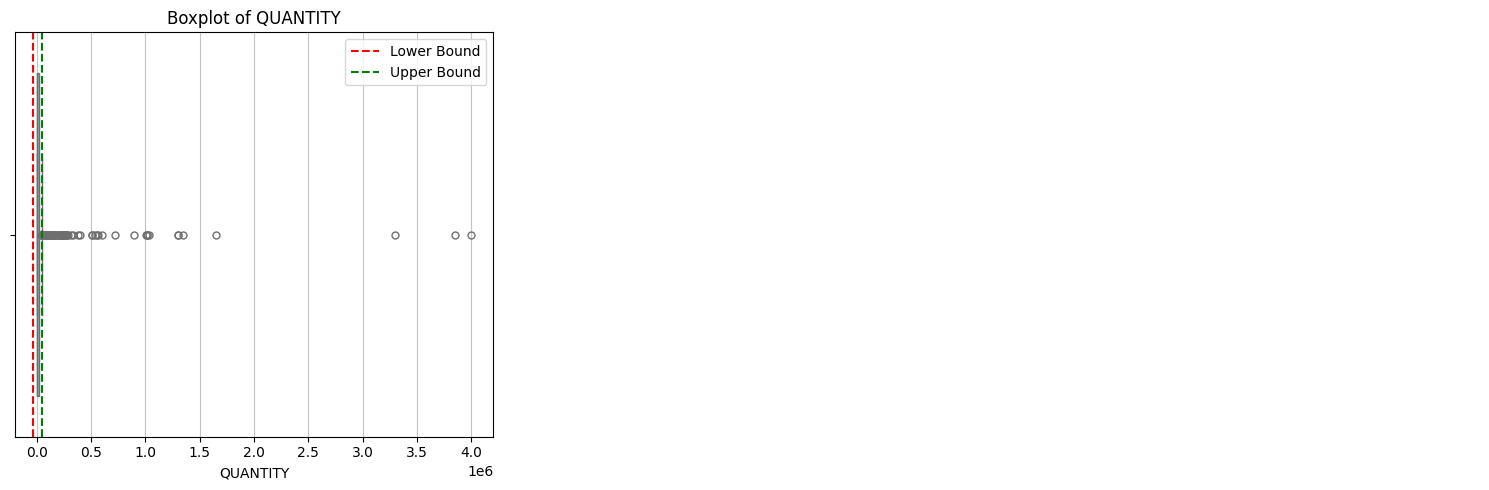

In [525]:
# Visualizing the outliers
# Calculating the number of rows and columns based on the number of numerical columns
num_columns = len(outlier_cols)
num_rows = int(np.ceil(num_columns / 3))

# Creating a figure and axes array for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plotting boxplots for each numerical column
for i, column in enumerate(outlier_cols):
    ax = axes[i]

    # Calculating IQR and bounds
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plotting the boxplot
    sns.boxplot(x=data[column], color='skyblue', flierprops=dict(marker='o', color='red', markersize=5), ax=ax)
    ax.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    ax.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)
    ax.legend()
    ax.grid(axis='x', alpha=0.75)


for i in range(num_columns, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [526]:
# Function to handle outliers by capping
def handle_outliers(data, method='cap'):
    for column in data.columns:
        if column == 'QUANTITY':
            lower_bound, upper_bound = -0.31, 0.03
            data[column] = data[column].apply(lambda x: min(max(x, lower_bound), upper_bound) if method == 'cap' else x)

    return data


# Applying the function to handle outliers
data_cleaned = handle_outliers(data.copy(), method='cap')

# Displaying the cleaned dataset
print(data_cleaned.head())

   IMPORTER  HSCODE     COUNTRY  UNIT  QUANTITY  DESCRIPTION_01  \
0         2       0  BANGLADESH     2      0.03               1   
1         2       0       INDIA     2      0.03               1   
2         2       0    MALAYSIA     2      0.03               1   
3         2       0  BANGLADESH     2      0.03               1   
4         2       0       INDIA     2      0.03               1   

   DESCRIPTION_02 DESCRIPTION_03  ENCODED_DESCRIPTION_03  
0               3       Chlorine                       2  
1               3       Chlorine                       2  
2               3       Chlorine                       2  
3               3       Chlorine                       2  
4               3       Chlorine                       2  


### **Assigning the Target Variable**

### **Assigning the Target Variable**

In [527]:
import pandas as pd

# Risk mapping for DESCRIPTION_03
risk_mapping = {
    'Chlorine': 'Low',
    'Nitric acid; sulphonitric acids': 'High',
    'Cyanides and cyanide oxides: of sodium': 'High',
    'Cyanides and cyanide oxides: other': 'High',
    'Hydrogen peroxide, whether or not solidified with urea.': 'High',
    'Iodine': 'Low',
    'Bromine': 'Low',
    'Chlorates and perchlorates; bromates and perbromates; iodates and periodates': 'High',
    'Mineral or chemical fertilizers, nitrogenous': 'Low',
    'Sulphuric acid; oleum': 'High',
    'Halides and halide oxides of non metals': 'Low',
    'Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts': 'Low'
}

# Defining the quantity thresholds
high_quantity_threshold = 10000
medium_quantity_threshold = 5000

# Defining only risky countries
risky_countries = {
    "NORTH KOREA", "IRAN", "SYRIA", "AFGHANISTAN", "PAKISTAN",
    "IRAQ", "YEMEN", "SOMALIA", "LIBYA", "SUDAN",
    "RUSSIA", "VENEZUELA", "MYANMAR"
}

# Function to calculate risk
def calculate_risk(description, quantity, country):
    description_risk = risk_mapping.get(description, 'Low')
    country_risk = 'High' if country.upper() in risky_countries else 'Low'

    # Determine risk based on description, quantity, and country
    if description_risk == 'High' and quantity > high_quantity_threshold:
        return 'Risky'
    elif description_risk == 'High' and country_risk == 'High' and quantity > medium_quantity_threshold:
        return 'Risky'
    elif country_risk == 'High' and quantity > medium_quantity_threshold:
        return 'Risky'
    elif quantity > high_quantity_threshold:
        return 'Risky'
    else:
        return 'Not Risky'

# Applying the function
data['RISK'] = data.apply(
    lambda row: calculate_risk(row['DESCRIPTION_03'], row['QUANTITY'], row['COUNTRY']),
    axis=1
)

In [528]:
# Displaying dataset head
print(data.head())

   IMPORTER  HSCODE     COUNTRY  UNIT  QUANTITY  DESCRIPTION_01  \
0         2       0  BANGLADESH     2  131600.0               1   
1         2       0       INDIA     2   37800.0               1   
2         2       0    MALAYSIA     2   12090.0               1   
3         2       0  BANGLADESH     2   25200.0               1   
4         2       0       INDIA     2   75599.0               1   

   DESCRIPTION_02 DESCRIPTION_03  ENCODED_DESCRIPTION_03   RISK  
0               3       Chlorine                       2  Risky  
1               3       Chlorine                       2  Risky  
2               3       Chlorine                       2  Risky  
3               3       Chlorine                       2  Risky  
4               3       Chlorine                       2  Risky  


## **Visualizing the Target Variable**

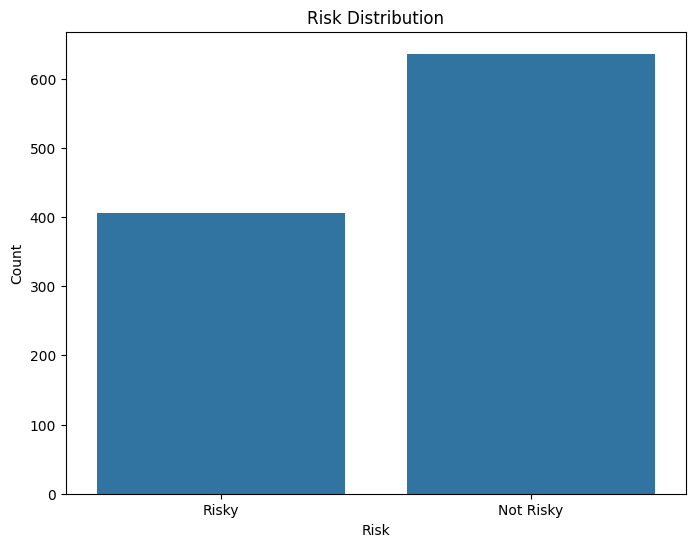

In [529]:
# Visualizing the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='RISK', data=data)
plt.title('Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.show()

In [530]:
# Step 17: Encoding the 'DESCRIPTION_03' column with label encoder and dropping the 'ENCODED_DESCRIPTION_03' column and saving the encoder
label_encoder = LabelEncoder()
data['DESCRIPTION_03'] = label_encoder.fit_transform(data['DESCRIPTION_03'])
data.drop(columns=['ENCODED_DESCRIPTION_03'], inplace=True)
with open('encoded_DESCRIPTION_03.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
    print("Encoded column: DESCRIPTION_03 saved successfully")

# Encoding the 'COUNTRY' column with label encoder and saving the encoder
label_encoder = LabelEncoder()
data['COUNTRY'] = label_encoder.fit_transform(data['COUNTRY'])
with open('encoded_COUNTRY.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
    print("Encoded column: COUNTRY saved successfully")

Encoded column: DESCRIPTION_03 saved successfully
Encoded column: COUNTRY saved successfully


In [531]:
# Step 18: Encoding the 'RISK' variable
label_encoder = LabelEncoder()
data['RISK'] = label_encoder.fit_transform(data['RISK'])

In [532]:
# Checking the correlation of the 'DESCRIPTION_03', 'QUANTITY' and the 'COUNTRY' columns to the target variable
correlation_matrix = data[['DESCRIPTION_03', 'QUANTITY', 'COUNTRY', 'RISK']].corr()
print(correlation_matrix)

                DESCRIPTION_03  QUANTITY   COUNTRY      RISK
DESCRIPTION_03        1.000000  0.061423  0.053694  0.037440
QUANTITY              0.061423  1.000000 -0.078168  0.221935
COUNTRY               0.053694 -0.078168  1.000000 -0.237249
RISK                  0.037440  0.221935 -0.237249  1.000000


**Dropping the 'DESCRIPTION_03', 'COUNTRY', and the 'QUANTITY' columns since these columns has a high correlation with the target variable**

In [533]:
# Step 19: Dropping the 'DESCRIPTION_03', 'COUNTRY', and the 'QUANTITY' columns
data.drop(columns=['DESCRIPTION_03', 'COUNTRY', 'QUANTITY'], inplace=True)

**Dropping the 'DESCRIPTION_01' column since the feature importatnce of the column is comparably very low.**

In [534]:
# Step 20: Dropping the 'DESCRIPTION_01' column
data.drop(columns=['DESCRIPTION_01'], inplace=True)

In [535]:
# Step 20: Splitting features and target
X = data.drop(columns=['RISK'])
y = data['RISK']

In [536]:
# Step 21: Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [537]:
# Analyzing the distribution of the y train dataset
unique_values, counts = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 510
Value: 1, Count: 323


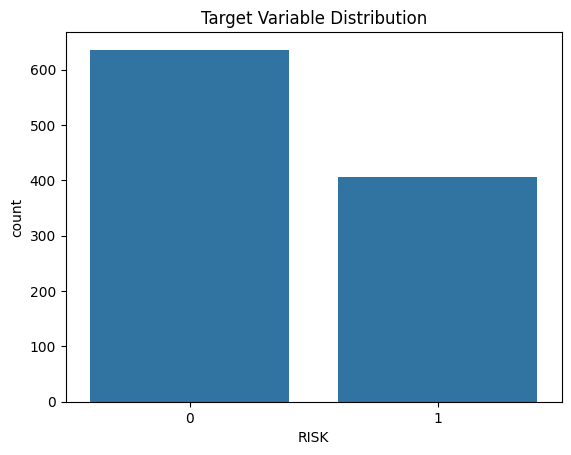

In [538]:
# Visualizing the distribution of the target variable
sns.countplot(data=data, x='RISK')
plt.title('Target Variable Distribution')
plt.show()

In [539]:
# Displaying the dataset shape
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (833, 4)
Shape of y_train: (833,)


In [540]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   IMPORTER        1042 non-null   int64
 1   HSCODE          1042 non-null   int64
 2   UNIT            1042 non-null   int64
 3   DESCRIPTION_02  1042 non-null   int64
 4   RISK            1042 non-null   int64
dtypes: int64(5)
memory usage: 40.8 KB
None


In [541]:
# Display dataset information
print("Dataset Information:")
print(data.head)

Dataset Information:
<bound method NDFrame.head of       IMPORTER  HSCODE  UNIT  DESCRIPTION_02  RISK
0            2       0     2               3     1
1            2       0     2               3     1
2            2       0     2               3     1
3            2       0     2               3     1
4            2       0     2               3     1
...        ...     ...   ...             ...   ...
1037         2      75     2               4     1
1038         2      75     2               4     1
1039         2      78     2               4     1
1040         2      78     2               4     1
1041         2      75     2               4     1

[1042 rows x 5 columns]>


## **Balancing the Target Variable**

In [542]:
# Handling the imbalance dataset

# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)

Original dataset size: (1042, 4)
Resampled dataset size: (1272, 4)


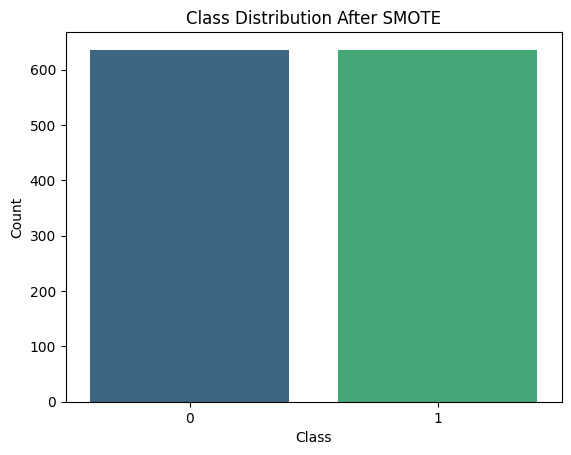

In [543]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [544]:
# Displaying the dataset shape after applying the SMOTE
print(f"Shape of X_resampled: {X_resampled.shape}")
print(f"Shape of y_resampled: {y_resampled.shape}")

Shape of X_resampled: (1272, 4)
Shape of y_resampled: (1272,)


In [545]:
# Standardizing the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [546]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [547]:
# Display dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   IMPORTER        1042 non-null   int64
 1   HSCODE          1042 non-null   int64
 2   UNIT            1042 non-null   int64
 3   DESCRIPTION_02  1042 non-null   int64
 4   RISK            1042 non-null   int64
dtypes: int64(5)
memory usage: 40.8 KB
None


# **Building the Model**

## **Model based on Gradient Boost**

In [548]:
# Defining Gradient Boosting Classifier
gb = GradientBoostingClassifier()

In [549]:
# Defining Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

In [550]:
# Performing GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [551]:
# Getting Best Model
best_gb_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [552]:
# Evaluating Model on Test Data
y_pred = best_gb_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8117647058823529

Confusion Matrix:
 [[105  23]
 [ 25 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       128
           1       0.82      0.80      0.81       127

    accuracy                           0.81       255
   macro avg       0.81      0.81      0.81       255
weighted avg       0.81      0.81      0.81       255



In [553]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_gb_model, X, y, cv=cv, n_jobs=-1)

print(f"Cross-validation accuracy: {scores.mean():.2f}")

Cross-validation accuracy: 0.83


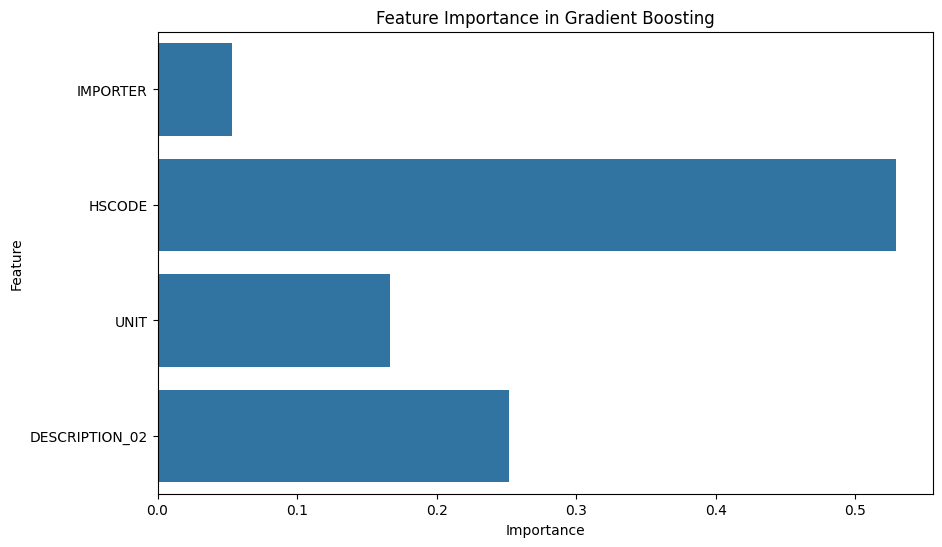

In [554]:
# Get feature importance
feature_importance = best_gb_model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting")
plt.show()

In [555]:
import joblib

# Saving the trained scaler
joblib.dump(scaler, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler_gb.pkl')

# Saving the trained Gradient Boosting Model
joblib.dump(best_gb_model, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/gb_model_class.pkl')

print("Gradient Boosting model and scaler saved successfully!")

Gradient Boosting model and scaler saved successfully!


In [556]:
import joblib

# Loading the Scaler
scaler = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler_gb.pkl')

# Loading the trained Gradient Boosting Model
gb_model_class = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/gb_model_class.pkl')

print("Gradient Boosting model and scaler loaded successfully!")

# Checking the number of features in the scaler
print(f"Number of features in the scaler: {scaler.n_features_in_}")

Gradient Boosting model and scaler loaded successfully!
Number of features in the scaler: 4


In [557]:
import numpy as np
import joblib
import warnings

# Suppress the specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Load encoders
description_03_encoder = joblib.load('encoded_DESCRIPTION_03.pkl')
hscode_encoder = joblib.load('encoded_HSCODE.pkl')
country_encoder = joblib.load('encoded_COUNTRY.pkl')
unit_encoder = joblib.load('encoded_UNIT.pkl')

# Function to encode inputs
def encode_inputs(country, hscode, description, quantity):
    try:
        # Encoding the inputs using the appropriate encoder for each feature
        country_encoded = country_encoder.transform([country])[0] if country in country_encoder.classes_ else len(country_encoder.classes_)
        description_encoded = description_03_encoder.transform([description])[0] if description in description_03_encoder.classes_ else len(description_03_encoder.classes_)
        hscode_encoded = hscode_encoder.transform([hscode])[0] if hscode in hscode_encoder.classes_ else len(hscode_encoder.classes_)

        # Using the 4 relevant features: country, hscode, description, quantity
        return (country_encoded, hscode_encoded, description_encoded, quantity)
    except Exception as e:
        raise ValueError(f"Encoding failed: {e}")

# Main function
def main():
    try:
        # User inputs
        importer = input("Enter importer: ").capitalize()
        year = int(input("Enter year: "))
        month = input("Enter month: ").capitalize()
        country = input("Enter country: ").upper()
        description = input("Enter description: ").capitalize()
        quantity = float(input("Enter quantity: "))
        value = float(input("Enter value: "))
        hscode = int(input("Enter HS code: "))
        unit = input("Enter unit: ").upper()

        # Encode inputs (now including country)
        features = np.array(encode_inputs(country, hscode, description, quantity)).reshape(1, -1)

        # Scale features using the loaded scaler
        features_scaled = scaler.transform(features)

        # Predict risk classification using the model
        prediction = best_gb_model.predict(features_scaled)
        classification = 'risky' if prediction == 1 else 'not risky'

        # Output result
        print(f"Classification: {classification}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

Enter importer: Shabna Inc
Enter year: 2019
Enter month: JUNE
Enter country: INDIA
Enter description: Chlorine
Enter quantity: 20
Enter value: 2000
Enter HS code: 2801100000
Enter unit: KG
Classification: risky


# **Model Based on LightGBM**

In [559]:
# Importing the required libraries
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
# Defining the LightGBM model
model = lgb.LGBMClassifier()

In [ ]:
# Defining hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5],
    'num_leaves': [20, 31, 40],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [ ]:
# Using Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Performing Grid Search to find best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
# Training the best model
best_lgb_model = grid_search.best_estimator_

In [ ]:
# Evaluating on the test set
y_pred = best_lgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Displaying the results
print("Best LightGBM Parameters:", grid_search.best_params_)
print(f"Cross-validation Accuracy: {grid_search.best_score_:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:
# Get feature importance
feature_importance = best_lgb_model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting")
plt.show()

In [ ]:
import joblib

# Saving the trained scaler
joblib.dump(scaler, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler_lgb.pkl')

# Saving the trained LightGBM Model
joblib.dump(best_lgb_model, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/lightgbm_model.pkl')

print("LightGBM model and scaler saved successfully!")

In [ ]:
import joblib

# Loading the Scaler
scaler = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler_lgb.pkl')

# Loading the trained LightGBM Model
best_lgb_model = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/lightgbm_model.pkl')

print("LightGBM model and scaler loaded successfully!")

# Checking the number of features in the scaler
print(f"Number of features in the scaler: {scaler.n_features_in_}")

In [ ]:
import numpy as np
import joblib
import warnings
import lightgbm as lgb

# Suppress the specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Load encoders
importer_encoder = joblib.load('encoded_IMPORTER.pkl')
description_01_encoder = joblib.load('encoded_DESCRIPTION_01.pkl')
hscode_encoder = joblib.load('encoded_HSCODE.pkl')
country_encoder = joblib.load('encoded_COUNTRY.pkl')
unit_encoder = joblib.load('encoded_UNIT.pkl')


# Function to encode inputs
def encode_inputs(importer, hscode, description, quantity):
    try:
        importer_encoded = importer_encoder.transform([importer])[0] if importer in importer_encoder.classes_ else len(importer_encoder.classes_)
        description_encoded = description_01_encoder.transform([description])[0] if description in description_01_encoder.classes_ else len(description_01_encoder.classes_)
        hscode_encoded = hscode_encoder.transform([hscode])[0] if hscode in hscode_encoder.classes_ else len(hscode_encoder.classes_)

        # Only using the 4 relevant features: importer, hscode, description, quantity
        return (importer_encoded, hscode_encoded, description_encoded, quantity)
    except Exception as e:
        raise ValueError(f"Encoding failed: {e}")

# Main function
def main():
    try:
        # User inputs
        importer = input("Enter importer: ").capitalize()
        year = int(input("Enter year: "))
        month = input("Enter month: ").capitalize()
        country = input("Enter country: ").upper()
        description = input("Enter description: ").capitalize()
        quantity = float(input("Enter quantity: "))
        value = float(input("Enter value: "))
        hscode = int(input("Enter HS code: "))
        unit = input("Enter unit: ").upper()

        # Encode inputs (we now use only the 4 required features)
        features = np.array(encode_inputs(importer, hscode, description, quantity)).reshape(1, -1)

        # Scale features using the loaded scaler
        features_scaled = scaler.transform(features)

        # Predict risk classification using LightGBM model
        prediction = best_lgb_model.predict(features_scaled)
        classification = 'risky' if prediction == 1 else 'not risky'

        print(f"Classification: {classification}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()

# **Model Based on XGBoost**

In [ ]:
# pip install --upgrade xgboost scikit-learn

In [ ]:
# Importing required libraries
# import xgboost as xgb
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.metrics import accuracy_score

In [ ]:
# Defining XGBoost model
# xgb_model = xgb.XGBClassifier(
#    objective='binary:logistic',
#   eval_metric='logloss',
#   use_label_encoder=False
#)

In [ ]:
# Defining hyperparameter grid
# param_grid = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'max_depth': [3, 5, 7],
#    'subsample': [0.7, 0.8, 1.0],
#    'colsample_bytree': [0.7, 0.8, 1.0],
#   'gamma': [0, 0.1, 0.2]
#}

In [ ]:
# Stratified K-Fold Cross Validation
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV
# random_search = RandomizedSearchCV(
#   estimator=xgb_model,
#   param_distributions=param_grid,
#    n_iter=20,
#    cv=cv,
#    n_jobs=-1,
#    scoring='accuracy',
#    random_state=42
#)

In [ ]:
# Fitting the model
# random_search.fit(X_train, y_train)

In [ ]:
# Displaying best parameters
# print("Best XGBoost Parameters:", random_search.best_params_)

In [ ]:
# Evaluating on test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:
# Print results
# print("Best LightGBM Parameters:", grid_search.best_params_)
# print(f"Cross-validation Accuracy: {grid_search.best_score_:.2f}")
# print(f"Test Accuracy: {accuracy:.2f}")

# **Model Based on CatBoost**

In [ ]:
# Installing the necessary libraries
!pip install catboost

In [ ]:
# Importing the necessary libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
# Defining the CatBoost model
model = CatBoostClassifier(verbose=0)

In [ ]:
# Defining hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

In [ ]:
# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Grid Search for Best Parameters
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
# Train best model
best_cat_model = grid_search.best_estimator_

In [ ]:
# Evaluating on test set
y_pred = best_cat_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Displaying the results
print("Best CatBoost Parameters:", grid_search.best_params_)
print(f"Cross-validation Accuracy: {grid_search.best_score_:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:
# Get feature importance
feature_importance = best_cat_model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting")
plt.show()

In [ ]:
import joblib

# Saving the trained scaler
joblib.dump(scaler, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler_cat.pkl')

# Saving the trained CatBoost Model
joblib.dump(best_cat_model, '/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/catboost_model.pkl')

print("CatBoost model and scaler saved successfully!")

In [ ]:
import joblib

# Loading the Scaler
scaler = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/scaler_cat.pkl')

# Loading the trained CatBoost Model
best_cat_model = joblib.load('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/catboost_model.pkl')

print("CatBoost model and scaler loaded successfully!")

# Checking the number of features in the scaler
print(f"Number of features in the scaler: {scaler.n_features_in_}")

In [ ]:
import numpy as np
import joblib
import warnings
from catboost import CatBoostClassifier

# Suppress the specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Load encoders
importer_encoder = joblib.load('encoded_IMPORTER.pkl')
description_01_encoder = joblib.load('encoded_DESCRIPTION_01.pkl')
hscode_encoder = joblib.load('encoded_HSCODE.pkl')
country_encoder = joblib.load('encoded_COUNTRY.pkl')
unit_encoder = joblib.load('encoded_UNIT.pkl')

# Function to encode inputs
def encode_inputs(importer, hscode, description, quantity):
    try:
        importer_encoded = importer_encoder.transform([importer])[0] if importer in importer_encoder.classes_ else len(importer_encoder.classes_)
        description_encoded = description_01_encoder.transform([description])[0] if description in description_01_encoder.classes_ else len(description_01_encoder.classes_)
        hscode_encoded = hscode_encoder.transform([hscode])[0] if hscode in hscode_encoder.classes_ else len(hscode_encoder.classes_)

        # Only using the 4 relevant features: importer, hscode, description, quantity
        return (importer_encoded, hscode_encoded, description_encoded, quantity)
    except Exception as e:
        raise ValueError(f"Encoding failed: {e}")

# Main function
def main():
    try:
        # User inputs
        importer = input("Enter importer: ").capitalize()
        year = int(input("Enter year: "))
        month = input("Enter month: ").capitalize()
        country = input("Enter country: ").upper()
        description = input("Enter description: ").capitalize()
        quantity = float(input("Enter quantity: "))
        value = float(input("Enter value: "))
        hscode = int(input("Enter HS code: "))
        unit = input("Enter unit: ").upper()

        # Encode inputs (we now use only the 4 required features)
        features = np.array(encode_inputs(importer, hscode, description, quantity)).reshape(1, -1)

        # Scale features using the loaded scaler
        features_scaled = scaler.transform(features)

        # Predict risk classification using CatBoost model
        prediction = best_cat_model.predict(features_scaled)
        classification = 'risky' if prediction == 1 else 'not risky'

        print(f"Classification: {classification}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()